##**Maternal Health Risk**

###**Abstract**

I am working with a dataset aimed at predicting health risks in pregnant patients. The data, gathered from various sources such as hospitals, community clinics, and maternal health care facilities, utilizes an IoT-based risk monitoring system. It includes essential health factors like age, heart rate, systolic blood pressure, and diastolic blood pressure, enabling the assessment of the patient's risk level. My goal is to raise awareness about the significant impact of one's health on pregnancy outcomes, aiming to educate and inform women and others about this crucial connection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Stage 1**

Importing my dataset and the libraries I need to complete the data analysis needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

#load dataset"
df = pd.read_csv("/content/drive/MyDrive/Maternal_Health_Risk_Data_Set.csv")

Printing out the columns and data types

In [ ]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Prints out the first 5 rows of data

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Returns the description of the data in the DataFrame- like the mean, standard deviation, etc.

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


#**Stage 2**

Creating a boolean array from low risk patients and filtering the rows. The result will only display the patients who are flagged as low risk.

In [ ]:
low_risk_patients = df[df['RiskLevel'] == 'low risk']
low_risk_patients

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35,120,60,6.10,98.0,76,low risk
10,23,90,60,7.01,98.0,76,low risk
12,25,110,89,7.01,98.0,77,low risk
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
...,...,...,...,...,...,...,...
949,59,120,80,7.50,98.0,70,low risk
950,23,120,80,7.50,98.0,70,low risk
951,17,85,60,7.50,102.0,86,low risk
952,32,120,90,7.50,98.0,70,low risk


Changing the index of the DataFrame to the Age by using the set_index() method. The results will now display the age as the index, and it will not be sorted.

The inplace variable makes sure the Age index remains modified in place

In [ ]:
df.set_index('Age',inplace=True)
df

,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,,,,,,
25,130,80,15.0,98.0,86,high risk
35,140,90,13.0,98.0,70,high risk
29,90,70,8.0,100.0,80,high risk
30,140,85,7.0,98.0,70,high risk
35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...
22,120,60,15.0,98.0,80,high risk
55,120,90,18.0,98.0,60,high risk
35,85,60,19.0,98.0,86,high risk


Reseting the index with the reset_index() method

In [ ]:
#resets the index to normal and not the age
df.reset_index(inplace=True)

Creating a subset of rows where the patient is older than 25. I will then display the subset and print out only rows where the patient is older than 25.

In [ ]:
subset = df.loc[df['Age'] > 25]
subset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
7,35,85,60,11.0,102.0,86,high risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Using the subset to save it into a csv file

In [ ]:
#this saves the subset into a csv file
subset.to_csv(r'/content/subset_values.csv',index=True, header=False)

Defining the conditons of the Systolic Bp and Diastolic Bp, and putting them into a list

In [ ]:
conditions = [
   ((df['SystolicBP'] < 120) & (df['DiastolicBP'] < 80)),
    (((120 <= df['SystolicBP']) & (df['SystolicBP'] <= 129)) & (df['DiastolicBP'] < 80)),
    (((130 <= df['SystolicBP']) & (df['SystolicBP'] <= 139)) | ((80 <= df['DiastolicBP']) & (df['DiastolicBP'] <= 89))),
    ((df['SystolicBP'] >= 140) | (df['DiastolicBP'] >= 90))
]

Declaring a list of the BP readings, it will hold the values each condition will correspond to

In [ ]:
readings = ['Normal blood pressure', 'Elevated blood pressure', 'Stage 1 high blood pressure', 'Stage 2 high blood pressure']

Adding a new column into the DataFrame with the conditions of the Blood Pressure, and the diagnosis

In [ ]:
df['Diagnosis'] = np.select(conditions,readings)

Returns the new column at the end of the DataFrame with the diagnosis

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Diagnosis
0,25,130,80,15.0,98.0,86,high risk,Stage 1 high blood pressure
1,35,140,90,13.0,98.0,70,high risk,Stage 2 high blood pressure
2,29,90,70,8.0,100.0,80,high risk,Normal blood pressure
3,30,140,85,7.0,98.0,70,high risk,Stage 1 high blood pressure
4,35,120,60,6.1,98.0,76,low risk,Elevated blood pressure
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,Elevated blood pressure
1010,55,120,90,18.0,98.0,60,high risk,Stage 2 high blood pressure
1011,35,85,60,19.0,98.0,86,high risk,Normal blood pressure
1012,43,120,90,18.0,98.0,70,high risk,Stage 2 high blood pressure


#**Stage 3**

The isnull() method checks to see if any entries in the DataFrame are empty. It will display the data with boolean values in its place to show whether any entries are are empty.

In [ ]:
null_values = df.isnull()
null_values

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Diagnosis
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False,False


Checking to see if there are null values in the columns. It will display the column names with the total number of null values each row has.

In [ ]:
null_values.sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
Diagnosis      0
dtype: int64

Counts to see how many null values are in the whole DataFrame

In [ ]:
null_values.sum().sum()

0

Since my DataFrame has 0 null values, I will practice working with null values in a different data set.

In [ ]:
practice_data = {'first_set_of_numbers':  [1,2,3,4,5,np.nan,6,7,np.nan,np.nan,8,9,10,np.nan],
        'second_set_of_numbers': [11,12,np.nan,13,14,np.nan,15,16,np.nan,np.nan,17,np.nan,19,np.nan],
        'third_set_of_numbers': [20,21,22,23,np.nan,24,np.nan,26,27,np.nan,np.nan,28,29,30]}
df2 = pd.DataFrame(practice_data)
df2

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
0,1.0,11.0,20.0
1,2.0,12.0,21.0
2,3.0,NaN,22.0
3,4.0,13.0,23.0
4,5.0,14.0,NaN
5,NaN,NaN,24.0
6,6.0,15.0,NaN
7,7.0,16.0,26.0
8,NaN,NaN,27.0
9,NaN,NaN,NaN


The isnull() method will check if there are any null values in my practice dataset. It will display True for values that are null.

In [ ]:
practice_null_values = df2.isnull()
practice_null_values

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,False,True
5,True,True,False
6,False,False,True
7,False,False,False
8,True,True,False
9,True,True,True


The sum() method will add up all the null entries in the practice dataset. It will display the column names with the amount of null values in that column.

In [ ]:
practice_null_values.sum()

first_set_of_numbers     4
second_set_of_numbers    6
third_set_of_numbers     4
dtype: int64

The extra sum() method counts up the amount of null values in the whole DataFrame, and it will display the total.

In [ ]:
practice_null_values.sum().sum()

14

The describe method will generate descriptive statistics on the DataFrame. It will return the metadata information of the DataFrame.

In [ ]:
df2.describe()

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
count,10.00000,8.00000,10.000000
mean,5.50000,14.62500,25.000000
std,3.02765,2.66927,3.496029
min,1.00000,11.00000,20.000000
25%,3.25000,12.75000,22.250000
50%,5.50000,14.50000,25.000000
75%,7.75000,16.25000,27.750000
max,10.00000,19.00000,30.000000


Dropping the rows that have a null value in them.

In [ ]:
dropped_nullvalues = df2.dropna()
dropped_nullvalues

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
0,1.0,11.0,20.0
1,2.0,12.0,21.0
3,4.0,13.0,23.0
7,7.0,16.0,26.0
12,10.0,19.0,29.0


Using the describe method to see the changes made after I dropped the rows with the null values. The null values do affect the outcome of some of the statistical data.

In [ ]:
dropped_nullvalues.describe()

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
count,5.000000,5.000000,5.000000
mean,4.800000,14.200000,23.800000
std,3.701351,3.271085,3.701351
min,1.000000,11.000000,20.000000
25%,2.000000,12.000000,21.000000
50%,4.000000,13.000000,23.000000
75%,7.000000,16.000000,26.000000
max,10.000000,19.000000,29.000000


The ffill() method will fill all the null values in the Dataframe. It will do so by using the last valid entry and copying it into the null value's entry. It will display a full DataFrame with no null values.

In [ ]:
filling_nullvalues = df2.ffill()
filling_nullvalues

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
0,1.0,11.0,20.0
1,2.0,12.0,21.0
2,3.0,12.0,22.0
3,4.0,13.0,23.0
4,5.0,14.0,23.0
5,5.0,14.0,24.0
6,6.0,15.0,24.0
7,7.0,16.0,26.0
8,7.0,16.0,27.0
9,7.0,16.0,27.0


The descriptive statistics of the DataFrame with filled null values. The values of the statistics increase in some areas.

In [ ]:
filling_nullvalues.describe()

,first_set_of_numbers,second_set_of_numbers,third_set_of_numbers
count,14.000000,14.000000,14.000000
mean,6.000000,15.071429,25.071429
std,2.828427,2.525692,3.075068
min,1.000000,11.000000,20.000000
25%,4.250000,13.250000,23.000000
50%,6.500000,15.500000,25.000000
75%,7.750000,16.750000,27.000000
max,10.000000,19.000000,30.000000


The fillna() method will fill the null values with the value I choose. I have picked out the first column of the dataframe, so I can replace the null values. It will display the first column with the null values as 2.5  

In [ ]:
fill_column = df2['first_set_of_numbers'].fillna(value=2.5)
fill_column

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      2.5
6      6.0
7      7.0
8      2.5
9      2.5
10     8.0
11     9.0
12    10.0
13     2.5
Name: first_set_of_numbers, dtype: float64

The describe method in this case, will only display the descriptive statistics from the first column. Only a few of the statistics have changed when I filled the null values.

In [ ]:
fill_column.describe()

count    14.000000
mean      4.642857
std       2.885165
min       1.000000
25%       2.500000
50%       3.500000
75%       6.750000
max      10.000000
Name: first_set_of_numbers, dtype: float64

###Graphs

I am displaying the first ten values of the DataFrame

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Diagnosis
0,25,130,80,15.00,98.0,86,high risk,Stage 1 high blood pressure
1,35,140,90,13.00,98.0,70,high risk,Stage 2 high blood pressure
2,29,90,70,8.00,100.0,80,high risk,Normal blood pressure
3,30,140,85,7.00,98.0,70,high risk,Stage 1 high blood pressure
4,35,120,60,6.10,98.0,76,low risk,Elevated blood pressure
5,23,140,80,7.01,98.0,70,high risk,Stage 1 high blood pressure
6,23,130,70,7.01,98.0,78,mid risk,Stage 1 high blood pressure
7,35,85,60,11.00,102.0,86,high risk,Normal blood pressure
8,32,120,90,6.90,98.0,70,mid risk,Stage 2 high blood pressure
9,42,130,80,18.00,98.0,70,high risk,Stage 1 high blood pressure


I split the Age column into three categories. Depending on the Age range of the patient, and putting into a subplot.

In [ ]:
young = df[(df.Age <= 24)]
mid = df[(df.Age > 24) & (df.Age < 50)]
old = df[(df.Age >= 50)]

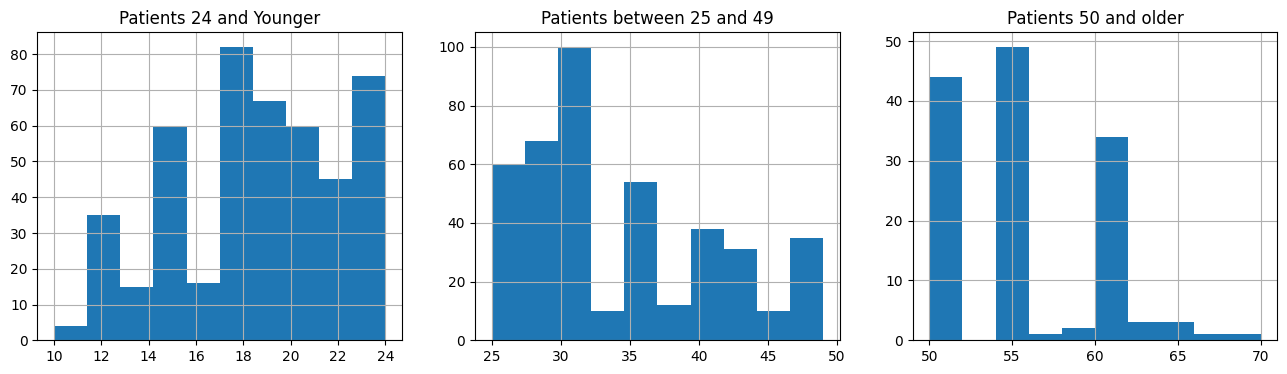

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))

young_plot = young.Age.hist(ax=axes[0]).set_title('Patients 24 and Younger')
mid_plot = mid.Age.hist(ax=axes[1]).set_title('Patients between 25 and 49')
old_plot= old.Age.hist(ax=axes[2]).set_title('Patients 50 and older')

I am plotting the three subplots together. The graph will show the Age ranges depicted by the colors I have set.

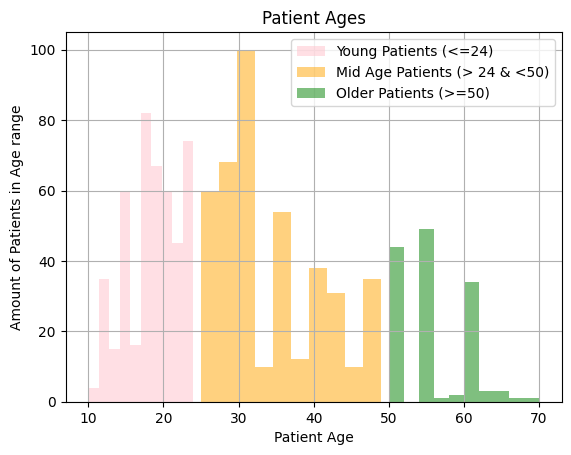

In [ ]:
young.Age.hist(alpha=0.5, color='pink')
mid.Age.hist(alpha=0.5,color='orange')
old.Age.hist(alpha=0.5,color='green')

plt.title("Patient Ages")
plt.legend(['Young Patients (<=24)', 'Mid Age Patients (> 24 & <50)','Older Patients (>=50)'])
plt.xlabel('Patient Age')
plt.ylabel('Amount of Patients in Age range')
plt.show()

I have selected SystolicBP and DiastolicBP to plot together. The plot will show if there is any possible relationship between the two columns.

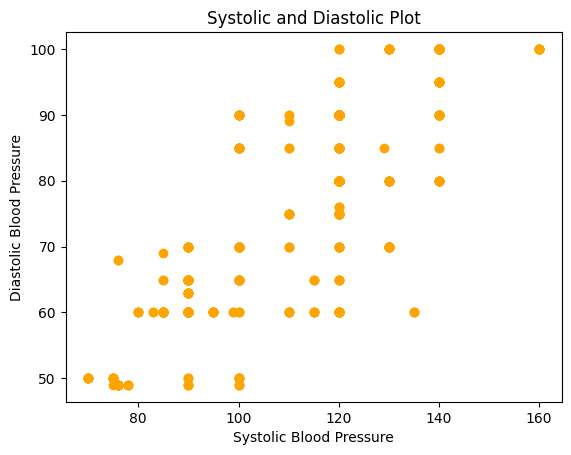

In [ ]:
#scatter plot
plt.scatter(df['SystolicBP'], df['DiastolicBP'],c='orange')
plt.title('Systolic and Diastolic Plot')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure');

I have put Age, BS (blood sugar), and HeartRate columns and plotted them into a line graph. Each column has a color and line style so it is easily identified. The graph will display the legend with the color and linestyle information, and there is a text annotation with an arrow pointing at the Oldest patient listed. The x-axis is the patient's index. I have also added a line of code to save my line graph as a png file.

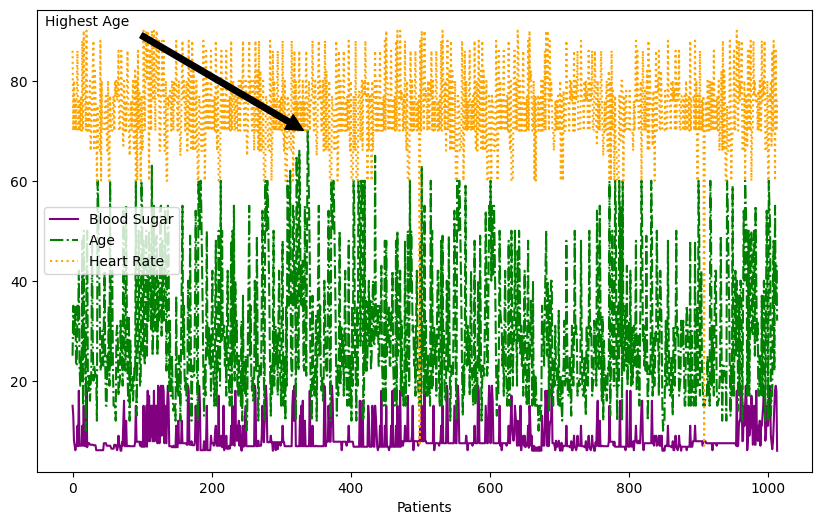

In [ ]:
#multiline plot
plt.figure(figsize=(10,6))
plt.plot(df['BS'],label = 'Blood Sugar', color = 'purple')
plt.plot(df['Age'], label = 'Age', color = 'green', linestyle='dashdot')
plt.plot(df['HeartRate'], label = 'Heart Rate', color = 'orange', linestyle ='dotted')
plt.xlabel('Patients')
plt.legend()
plt.annotate('Highest Age',xy=(345,69),xytext=(0.01, .99), textcoords='axes fraction',
             va='top', ha='left',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig("multiline-graph.png")
plt.show()


I have chosen to plot the RiskLevel of the patients, and their Heart rate together in a bar plot. It will display the categories of the risk level on the x-axis, and the y-axis is the heart rate of the patient.

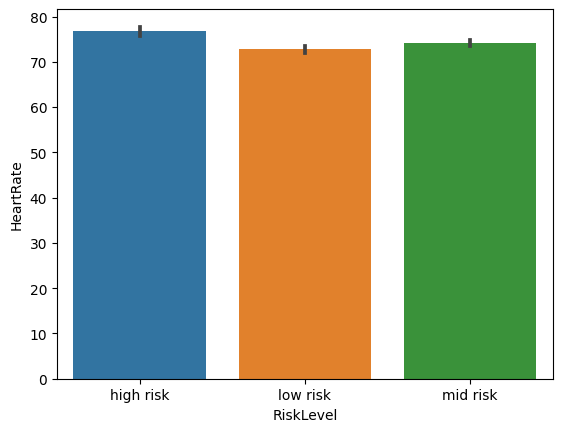

In [ ]:
rl_ind = df.set_index('RiskLevel')
sns.barplot(x=df['RiskLevel'],y=df['HeartRate']);

#**Stage 4**

Creating a new DataFrame and using two index values.

In [ ]:
df3 = df.set_index(['RiskLevel','Diagnosis'])

Printing out the new DataFrame.

In [ ]:
df3

Age  SystolicBP  DiastolicBP    BS  \
RiskLevel Diagnosis                                                         
high risk Stage 1 high blood pressure   25         130           80  15.0   
          Stage 2 high blood pressure   35         140           90  13.0   
          Normal blood pressure         29          90           70   8.0   
          Stage 1 high blood pressure   30         140           85   7.0   
low risk  Elevated blood pressure       35         120           60   6.1   
...                                    ...         ...          ...   ...   
high risk Elevated blood pressure       22         120           60  15.0   
          Stage 2 high blood pressure   55         120           90  18.0   
          Normal blood pressure         35          85           60  19.0   
          Stage 2 high blood pressure   43         120           90  18.0   
mid risk  Elevated blood pressure       32         120           65   6.0   

                                       BodyTemp  HeartRate  
RiskLevel Diagnosis                                         
high risk Stage 1 high blood pressure      98.0         86  
          Stage 2 high blood pressure      98.0         70  
          Normal blood pressure           100.0         80  
          Stage 1 high blood pressure      98.0         70  
low risk  Elevated blood pressure          98.0         76  
...                                         ...        ...  
high risk Elevated blood pressure          98.0         80  
          Stage 2 high blood pressure      98.0         60  
          Normal blood pressure            98.0         86  
          Stage 2 high blood pressure      98.0         70  
mid risk  Elevated blood pressure         101.0         76  

[1014 rows x 6 columns]

Select two or more notable category names from your dataset to display their contents (e.g., df["Georgia"]). Explain the output.

The output displays the DataFrame 3 with the new indexes, as well as the Age column.

In [ ]:
df3['Age']

RiskLevel  Diagnosis                  
high risk  Stage 1 high blood pressure    25
           Stage 2 high blood pressure    35
           Normal blood pressure          29
           Stage 1 high blood pressure    30
low risk   Elevated blood pressure        35
                                          ..
high risk  Elevated blood pressure        22
           Stage 2 high blood pressure    55
           Normal blood pressure          35
           Stage 2 high blood pressure    43
mid risk   Elevated blood pressure        32
Name: Age, Length: 1014, dtype: int64

The output will display the two indexes from DataFrame 3,and also the Systolic BP

In [ ]:
df3['SystolicBP']

RiskLevel  Diagnosis                  
high risk  Stage 1 high blood pressure    130
           Stage 2 high blood pressure    140
           Normal blood pressure           90
           Stage 1 high blood pressure    140
low risk   Elevated blood pressure        120
                                         ... 
high risk  Elevated blood pressure        120
           Stage 2 high blood pressure    120
           Normal blood pressure           85
           Stage 2 high blood pressure    120
mid risk   Elevated blood pressure        120
Name: SystolicBP, Length: 1014, dtype: int64

Using the groupby function to group by the index values. Since I have duplicate rows, I will only use the first data entry in the set of duplicates.

In [ ]:
df3.groupby(by=['RiskLevel','Diagnosis']).first()
df3

Age  SystolicBP  DiastolicBP    BS  \
RiskLevel Diagnosis                                                         
high risk Stage 1 high blood pressure   25         130           80  15.0   
          Stage 2 high blood pressure   35         140           90  13.0   
          Normal blood pressure         29          90           70   8.0   
          Stage 1 high blood pressure   30         140           85   7.0   
low risk  Elevated blood pressure       35         120           60   6.1   
...                                    ...         ...          ...   ...   
high risk Elevated blood pressure       22         120           60  15.0   
          Stage 2 high blood pressure   55         120           90  18.0   
          Normal blood pressure         35          85           60  19.0   
          Stage 2 high blood pressure   43         120           90  18.0   
mid risk  Elevated blood pressure       32         120           65   6.0   

                                       BodyTemp  HeartRate  
RiskLevel Diagnosis                                         
high risk Stage 1 high blood pressure      98.0         86  
          Stage 2 high blood pressure      98.0         70  
          Normal blood pressure           100.0         80  
          Stage 1 high blood pressure      98.0         70  
low risk  Elevated blood pressure          98.0         76  
...                                         ...        ...  
high risk Elevated blood pressure          98.0         80  
          Stage 2 high blood pressure      98.0         60  
          Normal blood pressure            98.0         86  
          Stage 2 high blood pressure      98.0         70  
mid risk  Elevated blood pressure         101.0         76  

[1014 rows x 6 columns]

In [ ]:
df3.iloc[np.where(df3.index.duplicated())]

Age  SystolicBP  DiastolicBP     BS  \
RiskLevel Diagnosis                                                          
high risk Stage 1 high blood pressure   30         140           85   7.00   
          Stage 1 high blood pressure   23         140           80   7.01   
          Normal blood pressure         35          85           60  11.00   
          Stage 1 high blood pressure   42         130           80  18.00   
mid risk  Stage 1 high blood pressure   19         120           80   7.00   
...                                    ...         ...          ...    ...   
high risk Elevated blood pressure       22         120           60  15.00   
          Stage 2 high blood pressure   55         120           90  18.00   
          Normal blood pressure         35          85           60  19.00   
          Stage 2 high blood pressure   43         120           90  18.00   
mid risk  Elevated blood pressure       32         120           65   6.00   

                                       BodyTemp  HeartRate  
RiskLevel Diagnosis                                         
high risk Stage 1 high blood pressure      98.0         70  
          Stage 1 high blood pressure      98.0         70  
          Normal blood pressure           102.0         86  
          Stage 1 high blood pressure      98.0         70  
mid risk  Stage 1 high blood pressure      98.0         70  
...                                         ...        ...  
high risk Elevated blood pressure          98.0         80  
          Stage 2 high blood pressure      98.0         60  
          Normal blood pressure            98.0         86  
          Stage 2 high blood pressure      98.0         70  
mid risk  Elevated blood pressure         101.0         76  

[1002 rows x 6 columns]

In [ ]:
df3 = df3[~df3.index.duplicated(keep='first')]
df3

Age  SystolicBP  DiastolicBP     BS  \
RiskLevel Diagnosis                                                          
high risk Stage 1 high blood pressure   25         130           80  15.00   
          Stage 2 high blood pressure   35         140           90  13.00   
          Normal blood pressure         29          90           70   8.00   
low risk  Elevated blood pressure       35         120           60   6.10   
mid risk  Stage 1 high blood pressure   23         130           70   7.01   
          Stage 2 high blood pressure   32         120           90   6.90   
low risk  Normal blood pressure         23          90           60   7.01   
          Stage 1 high blood pressure   25         110           89   7.01   
mid risk  Elevated blood pressure       20         120           75   7.01   
low risk  Stage 2 high blood pressure   49         120           90   7.20   
mid risk  Normal blood pressure         29          90           70   6.70   
high risk Elevated blood pressure       29         120           70   9.00   

                                       BodyTemp  HeartRate  
RiskLevel Diagnosis                                         
high risk Stage 1 high blood pressure      98.0         86  
          Stage 2 high blood pressure      98.0         70  
          Normal blood pressure           100.0         80  
low risk  Elevated blood pressure          98.0         76  
mid risk  Stage 1 high blood pressure      98.0         78  
          Stage 2 high blood pressure      98.0         70  
low risk  Normal blood pressure            98.0         76  
          Stage 1 high blood pressure      98.0         77  
mid risk  Elevated blood pressure         100.0         70  
low risk  Stage 2 high blood pressure      98.0         77  
mid risk  Normal blood pressure            98.0         80  
high risk Elevated blood pressure          98.0         80

The unstack method is used to pivot a level of the index labels, essentially converting a multi-level index Series or DataFrame into a reshaped DataFrame. It rearranges the data by moving the innermost level of the row index labels to become the innermost level of the column index labels, effectively "unstacking" the data.

In [ ]:
df3.unstack()

Age                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                      29                    29   
low risk                       35                    23   
mid risk                       20                    29   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                          25                          35   
low risk                           25                          49   
mid risk                           23                          32   

                       SystolicBP                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                     120                    90   
low risk                      120                    90   
mid risk                      120                    90   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                         130                         140   
low risk                          110                         120   
mid risk                          130                         120   

                      DiastolicBP                        ...  \
Diagnosis Elevated blood pressure Normal blood pressure  ...   
RiskLevel                                                ...   
high risk                      70                    70  ...   
low risk                       60                    60  ...   
mid risk                       75                    70  ...   

                                   BS                              \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                       15.00                        13.0   
low risk                         7.01                         7.2   
mid risk                         7.01                         6.9   

                         BodyTemp                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                    98.0                 100.0   
low risk                     98.0                  98.0   
mid risk                    100.0                  98.0   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                        98.0                        98.0   
low risk                         98.0                        98.0   
mid risk                         98.0                        98.0   

                        HeartRate                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                      80                    80   
low risk                       76                    76   
mid risk                       70                    80   

                                                                   
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure  
RiskLevel                                                          
high risk                          86                          70  
low risk                           77                          77  
mid risk                           78                          70  

[3 rows x 24 columns]

Finding the total sum of the values within the 'RiskLevel' index.

In [ ]:
df3.groupby(level='RiskLevel').sum()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,118,480,310,45.00,394.0,316
low risk,132,440,299,27.32,392.0,306
mid risk,104,460,305,27.62,394.0,298


Finding the mean of the values within the 'RiskLevel' index.

In [ ]:
df3.groupby(level='RiskLevel').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,29.5,120.0,77.50,11.250,98.5,79.0
low risk,33.0,110.0,74.75,6.830,98.0,76.5
mid risk,26.0,115.0,76.25,6.905,98.5,74.5


Finding the total sum of the values within the 'Diagnosis' index.

In [ ]:
df3.groupby(level='Diagnosis').sum()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Diagnosis,,,,,,
Elevated blood pressure,84,360,205,22.11,296.0,226
Normal blood pressure,81,270,200,21.71,296.0,236
Stage 1 high blood pressure,73,370,239,29.02,294.0,241
Stage 2 high blood pressure,116,380,270,27.10,294.0,217


Finding the mean of the values within the 'Diagnosis' index.

In [ ]:
df3.groupby(level='Diagnosis').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Diagnosis,,,,,,
Elevated blood pressure,28.000000,120.000000,68.333333,7.370000,98.666667,75.333333
Normal blood pressure,27.000000,90.000000,66.666667,7.236667,98.666667,78.666667
Stage 1 high blood pressure,24.333333,123.333333,79.666667,9.673333,98.000000,80.333333
Stage 2 high blood pressure,38.666667,126.666667,90.000000,9.033333,98.000000,72.333333


I used the untack dataframe as a reference, and recreated it using the pivot table method.

In [ ]:
unstack_table = pd.pivot_table(data=df,index='RiskLevel',columns='Diagnosis',aggfunc='first')
unstack_table

Age                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                      29                    29   
low risk                       35                    23   
mid risk                       20                    29   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                          25                          35   
low risk                           25                          49   
mid risk                           23                          32   

                               BS                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                    9.00                  8.00   
low risk                     6.10                  7.01   
mid risk                     7.01                  6.70   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                       15.00                        13.0   
low risk                         7.01                         7.2   
mid risk                         7.01                         6.9   

                         BodyTemp                        ...  \
Diagnosis Elevated blood pressure Normal blood pressure  ...   
RiskLevel                                                ...   
high risk                    98.0                 100.0  ...   
low risk                     98.0                  98.0  ...   
mid risk                    100.0                  98.0  ...   

                          DiastolicBP                              \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                          80                          90   
low risk                           89                          90   
mid risk                           70                          90   

                        HeartRate                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                      80                    80   
low risk                       76                    76   
mid risk                       70                    80   

                                                                   \
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure   
RiskLevel                                                           
high risk                          86                          70   
low risk                           77                          77   
mid risk                           78                          70   

                       SystolicBP                        \
Diagnosis Elevated blood pressure Normal blood pressure   
RiskLevel                                                 
high risk                     120                    90   
low risk                      120                    90   
mid risk                      120                    90   

                                                                   
Diagnosis Stage 1 high blood pressure Stage 2 high blood pressure  
RiskLevel                                                          
high risk                         130                         140  
low risk                          110                         120  
mid risk                          130                         120  

[3 rows x 24 columns]

Merge and Concat

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Diagnosis
0,25,130,80,15.0,98.0,86,high risk,Stage 1 high blood pressure
1,35,140,90,13.0,98.0,70,high risk,Stage 2 high blood pressure
2,29,90,70,8.0,100.0,80,high risk,Normal blood pressure
3,30,140,85,7.0,98.0,70,high risk,Stage 1 high blood pressure
4,35,120,60,6.1,98.0,76,low risk,Elevated blood pressure
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,Elevated blood pressure
1010,55,120,90,18.0,98.0,60,high risk,Stage 2 high blood pressure
1011,35,85,60,19.0,98.0,86,high risk,Normal blood pressure
1012,43,120,90,18.0,98.0,70,high risk,Stage 2 high blood pressure


Splitting the DataFrame into two subsets

In [ ]:
df_subset1 = df[['Age','BodyTemp','Diagnosis','BS']]
df_subset1

,Age,BodyTemp,Diagnosis,BS
0,25,98.0,Stage 1 high blood pressure,15.0
1,35,98.0,Stage 2 high blood pressure,13.0
2,29,100.0,Normal blood pressure,8.0
3,30,98.0,Stage 1 high blood pressure,7.0
4,35,98.0,Elevated blood pressure,6.1
...,...,...,...,...
1009,22,98.0,Elevated blood pressure,15.0
1010,55,98.0,Stage 2 high blood pressure,18.0
1011,35,98.0,Normal blood pressure,19.0
1012,43,98.0,Stage 2 high blood pressure,18.0


Creating a second subset.

In [ ]:
df_subset2 = df[['SystolicBP','HeartRate','RiskLevel','DiastolicBP']]
df_subset2

,SystolicBP,HeartRate,RiskLevel,DiastolicBP
0,130,86,high risk,80
1,140,70,high risk,90
2,90,80,high risk,70
3,140,70,high risk,85
4,120,76,low risk,60
...,...,...,...,...
1009,120,80,high risk,60
1010,120,60,high risk,90
1011,85,86,high risk,60
1012,120,70,high risk,90


Using the concat method to put both of these subsets together by stacking them. It is concatenated using its columns (axis=1)

In [ ]:
concat_df = pd.concat([df_subset1,df_subset2],axis=1)
concat_df

,Age,BodyTemp,Diagnosis,BS,SystolicBP,HeartRate,RiskLevel,DiastolicBP
0,25,98.0,Stage 1 high blood pressure,15.0,130,86,high risk,80
1,35,98.0,Stage 2 high blood pressure,13.0,140,70,high risk,90
2,29,100.0,Normal blood pressure,8.0,90,80,high risk,70
3,30,98.0,Stage 1 high blood pressure,7.0,140,70,high risk,85
4,35,98.0,Elevated blood pressure,6.1,120,76,low risk,60
...,...,...,...,...,...,...,...,...
1009,22,98.0,Elevated blood pressure,15.0,120,80,high risk,60
1010,55,98.0,Stage 2 high blood pressure,18.0,120,60,high risk,90
1011,35,98.0,Normal blood pressure,19.0,85,86,high risk,60
1012,43,98.0,Stage 2 high blood pressure,18.0,120,70,high risk,90


The subsets are combined through an inner join, preserving both the left and right indices, and marking duplicate columns with the label 'remove'.

In [ ]:
merged_df = pd.merge(df_subset1,df_subset2, how='inner',left_index=True,
                     right_index=True, suffixes=('', '_remove'))
merged_df

,Age,BodyTemp,Diagnosis,BS,SystolicBP,HeartRate,RiskLevel,DiastolicBP
0,25,98.0,Stage 1 high blood pressure,15.0,130,86,high risk,80
1,35,98.0,Stage 2 high blood pressure,13.0,140,70,high risk,90
2,29,100.0,Normal blood pressure,8.0,90,80,high risk,70
3,30,98.0,Stage 1 high blood pressure,7.0,140,70,high risk,85
4,35,98.0,Elevated blood pressure,6.1,120,76,low risk,60
...,...,...,...,...,...,...,...,...
1009,22,98.0,Elevated blood pressure,15.0,120,80,high risk,60
1010,55,98.0,Stage 2 high blood pressure,18.0,120,60,high risk,90
1011,35,98.0,Normal blood pressure,19.0,85,86,high risk,60
1012,43,98.0,Stage 2 high blood pressure,18.0,120,70,high risk,90



Duplicate columns containing the term 'remove' will be removed from the merged dataframe.

In [ ]:
merged_df.drop([i for i in merged_df.columns if 'remove' in i],
               axis=1, inplace=True)

Pivot Table and Crosstab

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Diagnosis
0,25,130,80,15.0,98.0,86,high risk,Stage 1 high blood pressure
1,35,140,90,13.0,98.0,70,high risk,Stage 2 high blood pressure
2,29,90,70,8.0,100.0,80,high risk,Normal blood pressure
3,30,140,85,7.0,98.0,70,high risk,Stage 1 high blood pressure
4,35,120,60,6.1,98.0,76,low risk,Elevated blood pressure


Creating a pivot table with the indexes being 'RiskLevel' and 'Diagnosis'.

In [ ]:
table = pd.pivot_table(data=df,index=['RiskLevel','Diagnosis'])
table

Age         BS    BodyTemp  \
RiskLevel Diagnosis                                                       
high risk Elevated blood pressure      30.600000   9.780000   98.400000   
          Normal blood pressure        22.183333   9.755000  100.933333   
          Stage 1 high blood pressure  44.293103  11.881379   98.637931   
          Stage 2 high blood pressure  39.201389  13.368958   98.191667   
low risk  Elevated blood pressure      25.000000   7.000000   98.021622   
          Normal blood pressure        24.050000   7.180611   98.555556   
          Stage 1 high blood pressure  29.314050   7.377025   98.314050   
          Stage 2 high blood pressure  31.000000   7.166176   98.161765   
mid risk  Elevated blood pressure      28.258065   6.446452   98.741935   
          Normal blood pressure        23.378641   7.266019   99.524272   
          Stage 1 high blood pressure  30.798658   8.331074   98.483221   
          Stage 2 high blood pressure  31.264151   8.109434   98.528302   

                                       DiastolicBP  HeartRate  SystolicBP  
RiskLevel Diagnosis                                                        
high risk Elevated blood pressure        71.000000  74.000000  120.000000  
          Normal blood pressure          64.250000  75.783333   91.766667  
          Stage 1 high blood pressure    82.241379  76.862069  125.431034  
          Stage 2 high blood pressure    95.868056  77.284722  137.500000  
low risk  Elevated blood pressure        69.000000  68.513514  120.000000  
          Normal blood pressure          60.622222  73.866667   89.850000  
          Stage 1 high blood pressure    81.066116  72.768595  118.586777  
          Stage 2 high blood pressure    90.808824  72.191176  117.941176  
mid risk  Elevated blood pressure        66.129032  73.483871  120.000000  
          Normal blood pressure          62.009709  77.009709   93.592233  
          Stage 1 high blood pressure    78.489933  72.919463  123.221477  
          Stage 2 high blood pressure    90.754717  72.603774  118.867925

With 'margins=True,' all columns and rows will include partial group aggregates across their respective categories.

In [ ]:
margins_table = pd.pivot_table(data=df,index=['RiskLevel','Diagnosis'], margins=True)
margins_table

Age         BS    BodyTemp  \
RiskLevel Diagnosis                                                       
high risk Elevated blood pressure      30.600000   9.780000   98.400000   
          Normal blood pressure        22.183333   9.755000  100.933333   
          Stage 1 high blood pressure  44.293103  11.881379   98.637931   
          Stage 2 high blood pressure  39.201389  13.368958   98.191667   
low risk  Elevated blood pressure      25.000000   7.000000   98.021622   
          Normal blood pressure        24.050000   7.180611   98.555556   
          Stage 1 high blood pressure  29.314050   7.377025   98.314050   
          Stage 2 high blood pressure  31.000000   7.166176   98.161765   
mid risk  Elevated blood pressure      28.258065   6.446452   98.741935   
          Normal blood pressure        23.378641   7.266019   99.524272   
          Stage 1 high blood pressure  30.798658   8.331074   98.483221   
          Stage 2 high blood pressure  31.264151   8.109434   98.528302   
All                                    29.871795   8.725986   98.665089   

                                       DiastolicBP  HeartRate  SystolicBP  
RiskLevel Diagnosis                                                        
high risk Elevated blood pressure        71.000000  74.000000  120.000000  
          Normal blood pressure          64.250000  75.783333   91.766667  
          Stage 1 high blood pressure    82.241379  76.862069  125.431034  
          Stage 2 high blood pressure    95.868056  77.284722  137.500000  
low risk  Elevated blood pressure        69.000000  68.513514  120.000000  
          Normal blood pressure          60.622222  73.866667   89.850000  
          Stage 1 high blood pressure    81.066116  72.768595  118.586777  
          Stage 2 high blood pressure    90.808824  72.191176  117.941176  
mid risk  Elevated blood pressure        66.129032  73.483871  120.000000  
          Normal blood pressure          62.009709  77.009709   93.592233  
          Stage 1 high blood pressure    78.489933  72.919463  123.221477  
          Stage 2 high blood pressure    90.754717  72.603774  118.867925  
All                                      76.460552  74.301775  113.198225

This involves adding columns displaying the minimum, maximum, and median values of the rows in the dataframe based on the specified 'aggfunc' function.

In [ ]:
agg_table = pd.pivot_table(data=df,index=['RiskLevel','Diagnosis'],margins = True, aggfunc=['min','max','median'])
agg_table

min                                      \
                                      Age   BS BodyTemp DiastolicBP HeartRate   
RiskLevel Diagnosis                                                             
high risk Elevated blood pressure      22  7.2     98.0          60        70   
          Normal blood pressure        12  6.1     98.0          60        60   
          Stage 1 high blood pressure  17  6.9     98.0          60        60   
          Stage 2 high blood pressure  17  6.8     98.0          90        60   
low risk  Elevated blood pressure      16  6.1     98.0          60         7   
          Normal blood pressure        10  6.0     98.0          49        60   
          Stage 1 high blood pressure  12  6.1     98.0          80        60   
          Stage 2 high blood pressure  12  6.1     98.0          90        60   
mid risk  Elevated blood pressure      19  6.0     98.0          60        66   
          Normal blood pressure        10  6.0     98.0          50        60   
          Stage 1 high blood pressure  15  6.1     98.0          70        60   
          Stage 2 high blood pressure  12  6.7     98.0          90        60   
All                                    10  6.0     98.0          49         7   

                                                 max                 \
                                      SystolicBP Age    BS BodyTemp   
RiskLevel Diagnosis                                                   
high risk Elevated blood pressure            120  40  15.0    100.0   
          Normal blood pressure               83  45  19.0    103.0   
          Stage 1 high blood pressure        110  65  18.0    102.0   
          Stage 2 high blood pressure        100  63  19.0    103.0   
low risk  Elevated blood pressure            120  35   8.0     98.4   
          Normal blood pressure               70  70   7.9    103.0   
          Stage 1 high blood pressure        100  62  11.0    103.0   
          Stage 2 high blood pressure        100  65   7.9    103.0   
mid risk  Elevated blood pressure            120  35   8.0    101.0   
          Normal blood pressure               70  60   9.0    103.0   
          Stage 1 high blood pressure        100  60  18.0    102.0   
          Stage 2 high blood pressure        100  55  16.0    102.0   
All                                           70  70  19.0    103.0   

                                                                       median  \
                                      DiastolicBP HeartRate SystolicBP    Age   
RiskLevel Diagnosis                                                             
high risk Elevated blood pressure              75        80        120     29   
          Normal blood pressure                75        86        110     17   
          Stage 1 high blood pressure         100        88        140     48   
          Stage 2 high blood pressure         100        90        160     40   
low risk  Elevated blood pressure              76        77        120     23   
          Normal blood pressure                70        88        100     21   
          Stage 1 high blood pressure          89        88        129     23   
          Stage 2 high blood pressure         100        88        120     28   
mid risk  Elevated blood pressure              75        76        120     31   
          Normal blood pressure                70        86        115     20   
          Stage 1 high blood pressure         100        88        140     29   
          Stage 2 high blood pressure         100        88        120     28   
All                                           100        90        160     26   

                                                                            \
                                         BS BodyTemp DiastolicBP HeartRate   
RiskLevel Diagnosis                                                          
high risk Elevated blood pressure       9.0     98.0          75        7

The crosstab technique generates a basic cross tabulation involving the 'Diagnosis' and 'RiskLevel' columns. This produces a frequency table where the result showcases tabulated data.

In [ ]:
crosstab_table = pd.crosstab(df['Diagnosis'],df['RiskLevel'])
crosstab_table

RiskLevel,high risk,low risk,mid risk
Diagnosis,,,
Elevated blood pressure,10,37,31
Normal blood pressure,60,180,103
Stage 1 high blood pressure,58,121,149
Stage 2 high blood pressure,144,68,53


Using the heatmap method in Seaborn to create a map of the crosstab table from above.

<Axes: xlabel='RiskLevel', ylabel='Diagnosis'>

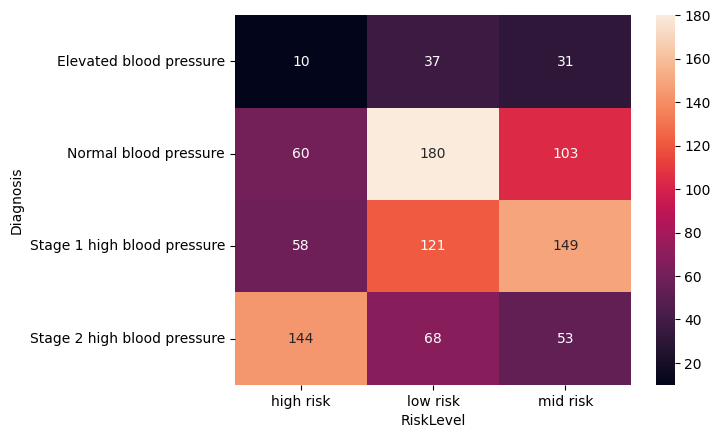

In [ ]:
sns.heatmap(crosstab_table,annot=True,fmt='g')

##**Extra Graphs**

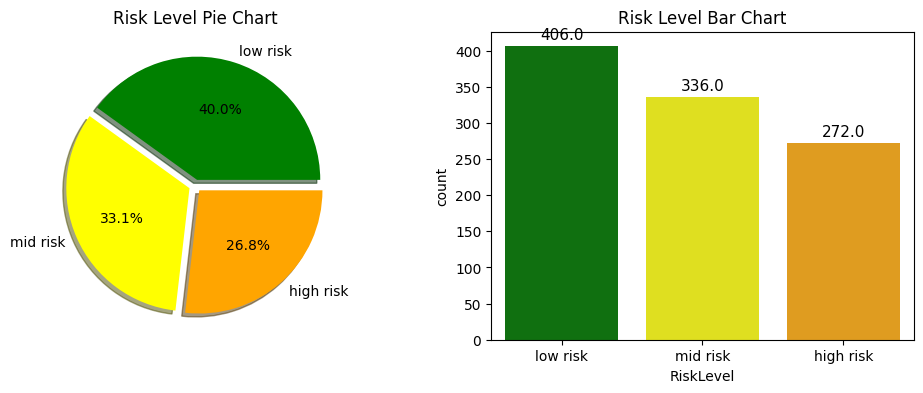

In [ ]:
p_colors = ['green', 'yellow', 'orange']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

<ipython-input-62-0ca9ead4ad88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


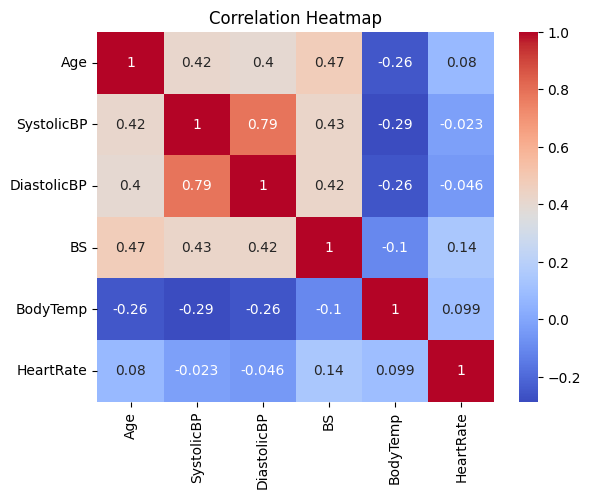

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##**Cross Tab Visualization**

In [ ]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='cool')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


In [ ]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='cool')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


In [ ]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='cool')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


In [ ]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='cool')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


In [ ]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='cool')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


In [ ]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='cool')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


##**Histogram Plots**

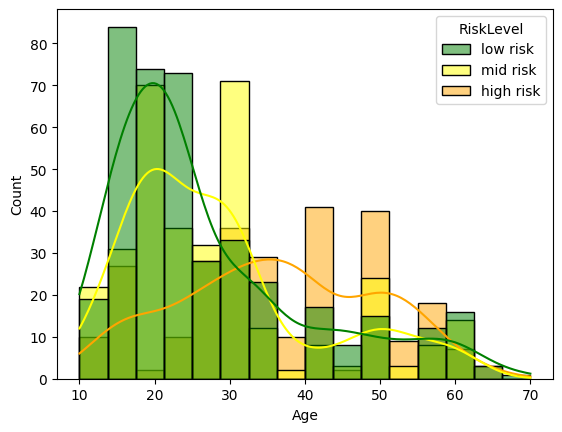

In [ ]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

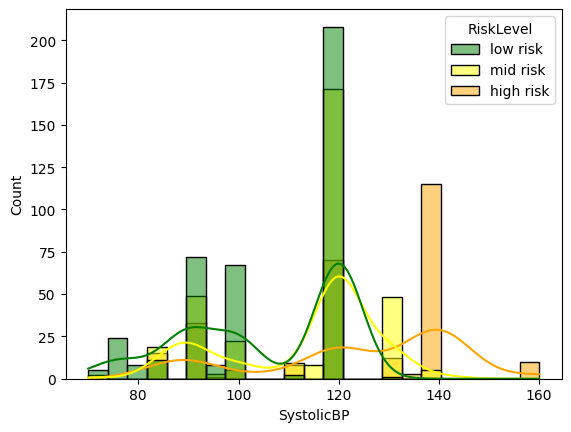

In [ ]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

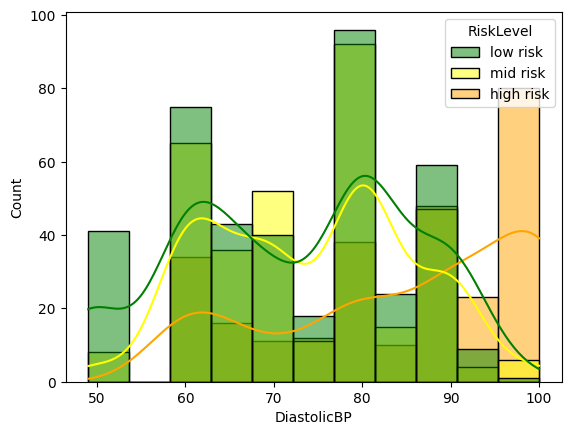

In [ ]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

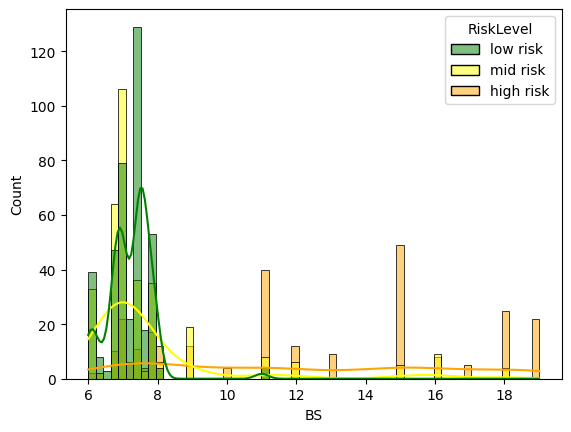

In [ ]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

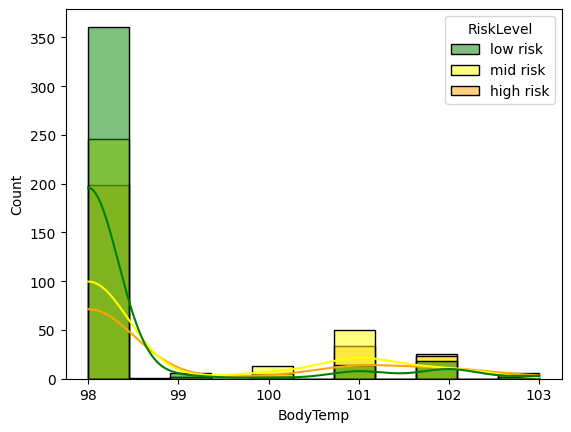

In [ ]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

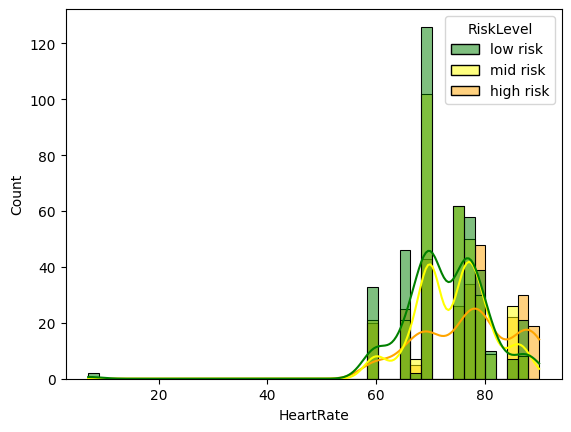

In [ ]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()